# Name - Aditya Ranjan
# Reg.No - 12311291
# Roll.No -65
Project Title: Breathe India: A Data-Driven Exploration of Air Quality Patterns

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
df = pd.read_csv('air.csv')
df.head()

,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,India,Assam,Nagaon,"Christianpatty, Nagaon - PCBA",05-04-2025 21:00:00,26.349082,92.684490,CO,18.0,76.0,30.0
1,India,Assam,Nalbari,"Bata Chowk, Nalbari - PCBA",05-04-2025 21:00:00,26.446912,91.439057,CO,16.0,42.0,27.0
2,India,Assam,Silchar,"Tarapur, Silchar - PCBA",05-04-2025 21:00:00,24.828270,92.795250,NO2,13.0,17.0,16.0
3,India,Assam,Silchar,"Tarapur, Silchar - PCBA",05-04-2025 21:00:00,24.828270,92.795250,CO,28.0,39.0,34.0
4,India,Assam,Sivasagar,"Girls College, Sivasagar - PCBA",05-04-2025 21:00:00,26.987634,94.636574,PM2.5,60.0,93.0,74.0


In [62]:
print("Dataset shape:", df.shape)
print("Column names:", df.columns.tolist())
df.info()
df.describe()

Dataset shape: (3005, 13)
Column names: ['country', 'state', 'city', 'station', 'last_update', 'latitude', 'longitude', 'pollutant_id', 'pollutant_min', 'pollutant_max', 'pollutant_avg', 'hour', 'time_of_day']
<class 'pandas.core.frame.DataFrame'>
Index: 3005 entries, 0 to 3228
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   country        3005 non-null   object        
 1   state          3005 non-null   object        
 2   city           3005 non-null   object        
 3   station        3005 non-null   object        
 4   last_update    3005 non-null   datetime64[ns]
 5   latitude       3005 non-null   float64       
 6   longitude      3005 non-null   float64       
 7   pollutant_id   3005 non-null   object        
 8   pollutant_min  3005 non-null   float64       
 9   pollutant_max  3005 non-null   float64       
 10  pollutant_avg  3005 non-null   float64       
 11  hour           3005 

,last_update,latitude,longitude,pollutant_min,pollutant_max,pollutant_avg,hour
count,3005,3005.000000,3005.000000,3005.000000,3005.000000,3005.000000,3005.0
mean,2025-04-05 21:00:00,22.342621,78.873794,24.221963,83.195008,46.959401,21.0
min,2025-04-05 21:00:00,8.514909,70.909168,1.000000,1.000000,1.000000,21.0
25%,2025-04-05 21:00:00,19.057575,75.578914,6.000000,21.000000,13.000000,21.0
50%,2025-04-05 21:00:00,23.142888,77.508730,14.000000,58.000000,32.000000,21.0
75%,2025-04-05 21:00:00,26.786682,81.005119,34.000000,115.000000,69.000000,21.0
max,2025-04-05 21:00:00,34.066206,94.636574,222.000000,491.000000,303.000000,21.0
std,NaN,5.499506,5.040363,26.534736,83.834664,43.953519,0.0


1.Clean & Process the Data and creating an AQI coloumn


In [64]:
df['last_update'] = pd.to_datetime(df['last_update'], format='%d-%m-%Y %H:%M:%S', errors='coerce')
df= df.dropna(subset=['pollutant_avg'])
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print(df.head())



  country  state       city                          station  \
0   India  Assam     Nagaon    Christianpatty, Nagaon - PCBA   
1   India  Assam    Nalbari       Bata Chowk, Nalbari - PCBA   
2   India  Assam    Silchar          Tarapur, Silchar - PCBA   
3   India  Assam    Silchar          Tarapur, Silchar - PCBA   
4   India  Assam  Sivasagar  Girls College, Sivasagar - PCBA   

          last_update   latitude  longitude pollutant_id  pollutant_min  \
0 2025-04-05 21:00:00  26.349082  92.684490           CO           18.0   
1 2025-04-05 21:00:00  26.446912  91.439057           CO           16.0   
2 2025-04-05 21:00:00  24.828270  92.795250          NO2           13.0   
3 2025-04-05 21:00:00  24.828270  92.795250           CO           28.0   
4 2025-04-05 21:00:00  26.987634  94.636574        PM2.5           60.0   

   pollutant_max  pollutant_avg  hour    time_of_day   aqi  
0           76.0           30.0    21  Evening/Night  30.0  
1           42.0           27.0    21  Eve

2.Find city with highest average AQI?

In [12]:
latest_date = df['last_update'].max()
cutoff_date = latest_date - pd.Timedelta(days=30)
recent_data = df[df['last_update'] >= cutoff_date]
city_avg = recent_data.groupby('city')['pollutant_avg'].mean()
city_avg = city_avg.sort_values(ascending=False)
city_avg.head(10)

city
Dhanbad           96.600000
Gurugram          86.800000
Singrauli         86.714286
Rourkela          83.666667
Bikaner           80.714286
Dewas             78.857143
Sawai Madhopur    78.714286
Ahmednagar        77.142857
Latur             77.000000
Katni             76.000000
Name: pollutant_avg, dtype: float64

<Axes: ylabel='city'>

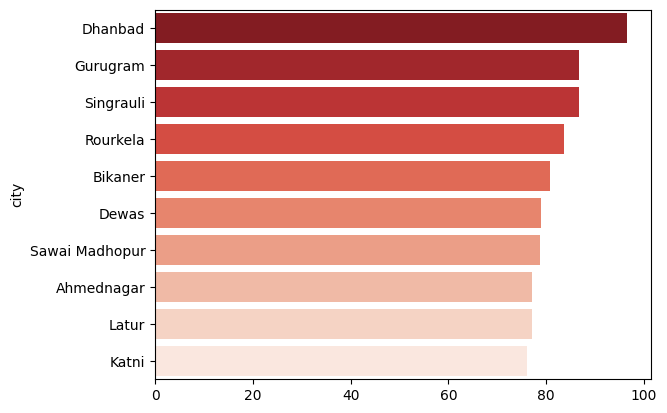

In [13]:
sns.barplot(x=city_avg.head(10).values, y=city_avg.head(10).index, hue=city_avg.head(10).index, palette='Reds_r', legend=False)

3: What is the correlation between PM2.5 and PM10 levels across all cities?


In [20]:
pm25 = df[df['pollutant_id'] == 'PM2.5'][['city', 'last_update', 'pollutant_avg']].rename(columns={'pollutant_avg': 'PM2.5'})
pm10 = df[df['pollutant_id'] == 'PM10'][['city', 'last_update', 'pollutant_avg']].rename(columns={'pollutant_avg': 'PM10'})
merged = pd.merge(pm25, pm10, on=['city', 'last_update'])
merged['PM2.5'].corr(merged['PM10'])

np.float64(0.5253329694652149)

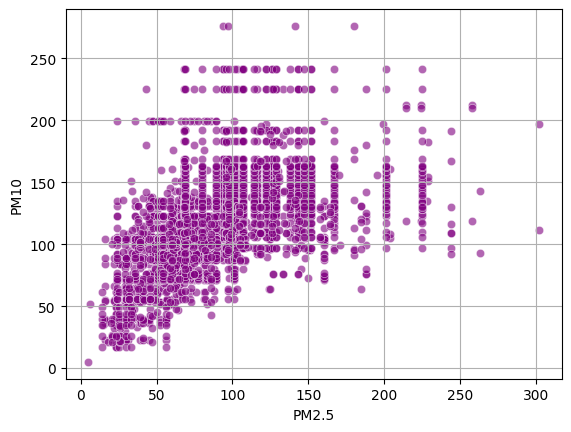

In [ ]:
sns.scatterplot(x='PM2.5', y='PM10', data=merged, alpha=0.6, color='purple')
plt.grid(True)

4: How does AQI vary across different times of the day (morning, afternoon, night)?

In [96]:
df['last_update'] = pd.to_datetime(df['last_update'])
df['hour'] = df['last_update'].dt.hour
def categorize_time(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'


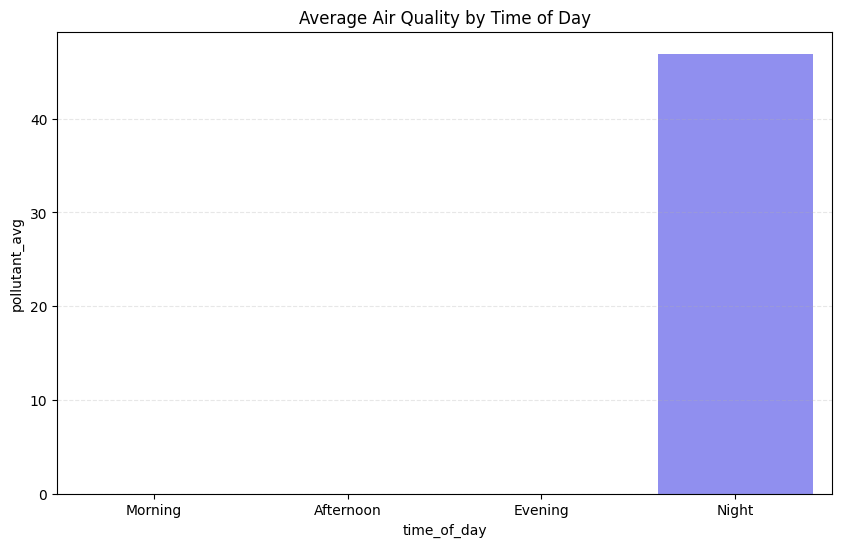

In [101]:
df['time_of_day'] = df['hour'].apply(categorize_time)
avg_aqi = df.groupby('time_of_day')['pollutant_avg'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='time_of_day',y='pollutant_avg',data=avg_aqi,order=['Morning', 'Afternoon', 'Evening', 'Night'],hue='time_of_day',palette='cool',legend=False)
plt.title('Average Air Quality by Time of Day')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

5. Are there any outliers in AQI values across monitoring stations?
   

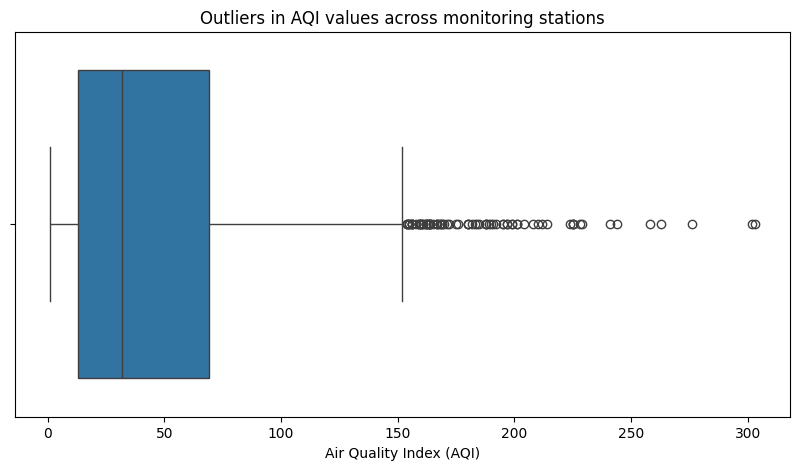

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='aqi')
plt.title('Outliers in AQI values across monitoring stations')
plt.xlabel('Air Quality Index (AQI)')
plt.show()


6: Which pollutants contribute most to poor AQI levels in metro cities?


In [69]:
metrocities = ['Delhi', 'Mumbai', 'Kolkata', 'Chennai', 'Bangalore', 'Hyderabad']
metrodf = df[df['city'].isin(metrocities)]
pollutant_impact = metrodf.groupby('pollutant_id')['aqi'].mean().sort_values(ascending=False)


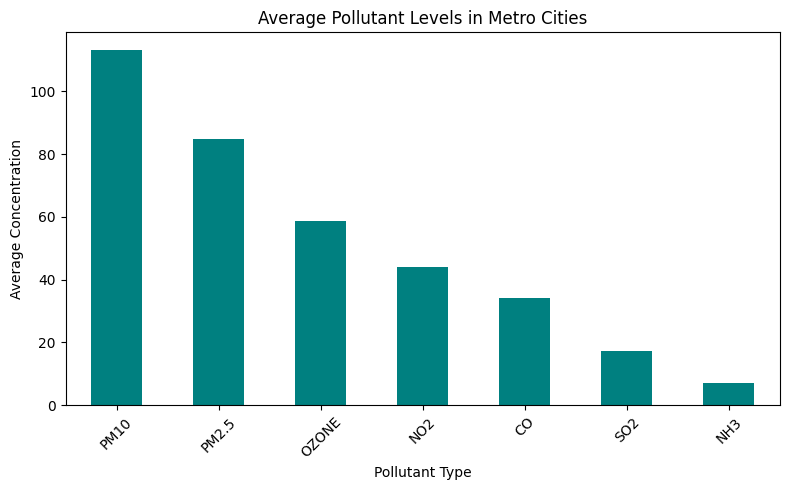

In [53]:
plt.figure(figsize=(8, 5))
pollutant_levels.plot(kind='bar', color='teal')
plt.title('Average Pollutant Levels in Metro Cities')
plt.ylabel('Average Concentration')
plt.xlabel('Pollutant Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


7.How does air quality vary across different states in India?

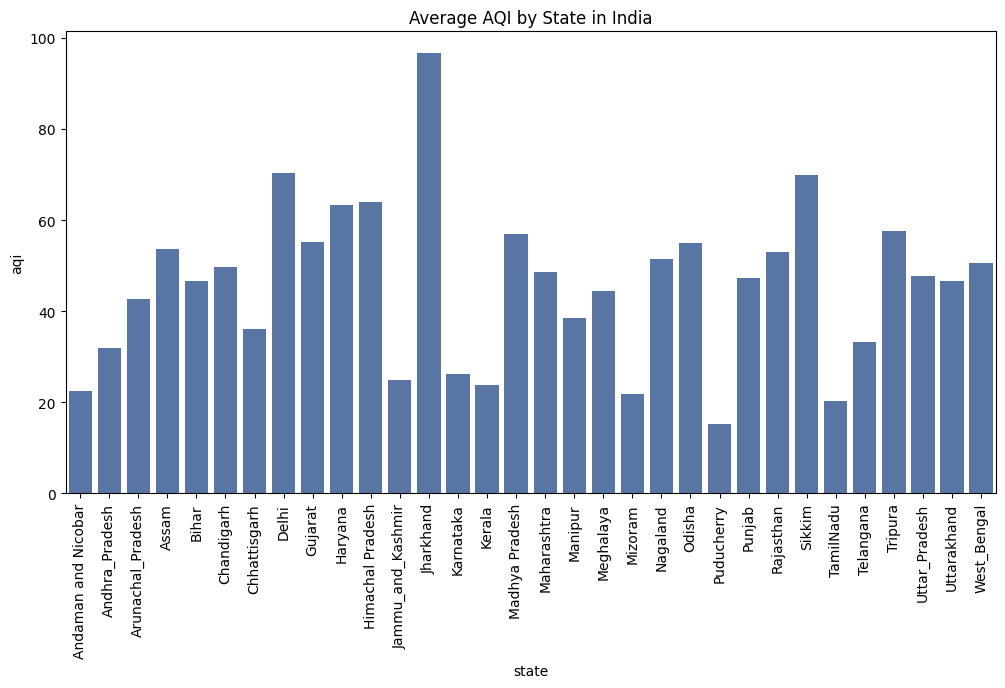

In [70]:
state_avg = df.groupby('state')['aqi'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=state_avg,x='state',y='aqi',color='#4C72B0')
plt.title("Average AQI by State in India")
plt.xticks(rotation=90)
plt.show()